1.数据预览

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [59]:
df=pd.read_csv(r"D:\学习\机器学习\数据分析\《Python数据分析与挖掘实战》源数据和代码\Python数据分析与挖掘实战\chapter7\demo\data\air_data.csv")

In [60]:
df.shape

(62988, 44)

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


2.数据处理

数据中存在“总票价”为0，但“总飞行公里数”不为0的吊诡现象。删除这部分后剩余62044行数据，可见这部分数据量很小，所以直接删除。（“总飞行公里数”为0，且平均折扣为0的不在此列）

In [62]:
df = df[df["SUM_YR_1"].notnull() & df["SUM_YR_2"].notnull()]
index1 = df["SUM_YR_1"] != 0
index2 = df["SUM_YR_2"] != 0
index3 = (df["SEG_KM_SUM"] == 0) & (df["avg_discount"] == 0)
df = df[index1 | index2| index3]
print(df.shape)

(62044, 44)


In [63]:
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,2005/05/08,2005/08/26,男,4,NaN,NaN,CN,34.0,2014/03/31,...,500,500,500,900,900,1.000000,0.000000,0.000000,0.997506,1
62975,30765,2008/11/16,2013/11/30,男,4,TAIPEI,NaN,TW,38.0,2014/03/31,...,0,0,0,400,400,1.000000,0.000000,0.000000,0.997506,0
62976,10380,2010/07/08,2011/06/21,男,4,贵阳市,贵州省,CN,33.0,2014/03/31,...,0,0,0,213,0,0.500000,0.500000,0.995327,0.000000,1
62977,16372,2012/12/20,2012/12/20,男,4,桃园,NaN,TW,47.0,2014/03/31,...,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0


In [64]:
df.reset_index(drop=True,inplace=True)

In [65]:
df1=df[["LAST_TO_END"]]

In [70]:
df1['流失指标']=df["L1Y_Flight_Count"]- df['P1Y_Flight_Count']

In [72]:
'''
for i in range(df1.shape[0]):
    if df['P1Y_Flight_Count'][i]>0:
        if (df["L1Y_Flight_Count"][i]- df['P1Y_Flight_Count'][i])/df["P1Y_Flight_Count"][i] >1:
            df1['流失指标'][i]=2
        else:
             df1['流失指标'][i]=(df["L1Y_Flight_Count"][i]- df['P1Y_Flight_Count'][i])/df["P1Y_Flight_Count"][i]
    else:
        df1['流失指标'][i]=1
'''

'\nfor i in range(df1.shape[0]):\n    if df[\'P1Y_Flight_Count\'][i]>0:\n        if (df["L1Y_Flight_Count"][i]- df[\'P1Y_Flight_Count\'][i])/df["P1Y_Flight_Count"][i] >1:\n            df1[\'流失指标\'][i]=2\n        else:\n             df1[\'流失指标\'][i]=(df["L1Y_Flight_Count"][i]- df[\'P1Y_Flight_Count\'][i])/df["P1Y_Flight_Count"][i]\n    else:\n        df1[\'流失指标\'][i]=1\n'

In [73]:
df1["LOAD_TIME"] = pd.to_datetime(df["LOAD_TIME"])
df1["FFP_DATE"] = pd.to_datetime(df["FFP_DATE"])


In [74]:
df1["入会时间"] = df1["LOAD_TIME"] - df1["FFP_DATE"]
df1["总票价"] = df["SUM_YR_1"] + df["SUM_YR_2"]
df1["每公里票价"] = (df["SUM_YR_1"] + df["SUM_YR_2"]) / df["SEG_KM_SUM"]
df1["季节性指标"] = df["MAX_INTERVAL"] - df["AVG_INTERVAL"]

In [75]:
df1['入会时间'] = df1['入会时间'].astype(np.int64)/(60*60*24*10**9)

In [76]:
df1["飞行次数" ]=df["FLIGHT_COUNT" ]
df1['总里程']=df['SEG_KM_SUM']
df1['平均折扣率']=df['avg_discount']
df1['年龄'] = df['AGE']

In [77]:
df1['最后一次消费时间'] = df1['LAST_TO_END']

In [78]:
df1.head()

,LAST_TO_END,流失指标,LOAD_TIME,FFP_DATE,入会时间,总票价,每公里票价,季节性指标,飞行次数,总里程,平均折扣率,年龄,最后一次消费时间
0,1,4,2014-03-31,2006-11-02,2706.0,473748.0,0.815798,14.516746,210,580717,0.961639,31.0,1
1,7,4,2014-03-31,2007-02-19,2597.0,338917.0,1.154043,11.805755,140,293678,1.252314,42.0,7
2,11,5,2014-03-31,2007-02-01,2615.0,328600.0,1.158217,12.701493,135,283712,1.254676,40.0,11
3,97,-3,2014-03-31,2008-08-22,2047.0,241850.0,0.859648,45.136364,23,281336,1.090870,64.0,97
4,5,10,2014-03-31,2009-04-10,1816.0,255262.0,0.823617,42.211921,152,309928,0.970658,48.0,5


In [79]:
df1.drop(["LOAD_TIME","FFP_DATE"],axis=1,inplace=True)

In [80]:
df1.drop(["LAST_TO_END"],axis=1,inplace=True)

In [85]:
df1.head()

,流失指标,入会时间,总票价,每公里票价,季节性指标,飞行次数,总里程,平均折扣率,年龄,最后一次消费时间
0,4,2706.0,473748.0,0.815798,14.516746,210,580717,0.961639,31.0,1
1,4,2597.0,338917.0,1.154043,11.805755,140,293678,1.252314,42.0,7
2,5,2615.0,328600.0,1.158217,12.701493,135,283712,1.254676,40.0,11
3,-3,2047.0,241850.0,0.859648,45.136364,23,281336,1.090870,64.0,97
4,10,1816.0,255262.0,0.823617,42.211921,152,309928,0.970658,48.0,5


In [86]:
df1.dropna(subset = ["年龄"], inplace = True)

In [87]:
df1.isnull().sum()

流失指标        0
入会时间        0
总票价         0
每公里票价       0
季节性指标       0
飞行次数        0
总里程         0
平均折扣率       0
年龄          0
最后一次消费时间    0
dtype: int64

数据标准化（归一化），将有量纲数据转化为无量纲数据。

In [88]:
df1_z = (df1 - df1.mean(axis=0))/(df1.std(axis=0))
df1_z.head()

,流失指标,入会时间,总票价,每公里票价,季节性指标,飞行次数,总里程,平均折扣率,年龄,最后一次消费时间
0,0.573323,1.440813,30.101078,0.606325,-0.989423,14.010015,26.739345,1.297782,-1.163711,-0.944236
1,0.573323,1.312177,21.328954,1.814966,-1.021038,9.057141,13.115513,2.871974,-0.051012,-0.911176
2,0.729856,1.333420,20.657729,1.829881,-1.010592,8.703365,12.642493,2.884760,-0.253321,-0.889136
3,-0.522415,0.663095,15.013761,0.763013,-0.632341,0.778768,12.529720,1.997647,2.174385,-0.415276
4,1.512526,0.390481,15.886348,0.634263,-0.666445,9.906205,13.886792,1.346625,0.555914,-0.922196


查看是否还有无空值。

In [89]:
df1_z.isnull().sum().sort_values()

流失指标        0
入会时间        0
总票价         0
每公里票价       0
季节性指标       0
飞行次数        0
总里程         0
平均折扣率       0
年龄          0
最后一次消费时间    0
dtype: int64

In [90]:
df1_z['年龄'].dropna(axis = 0, inplace=True)

In [91]:
df1_z.shape

(61632, 10)

计算簇惯性，寻找“拐点”。

In [92]:
from sklearn.cluster import KMeans

def distEclud(vecA, vecB):
    #计算两个向量的欧式距离的平方，并返回
    return np.sum(np.power(vecA - vecB, 2))
 
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train.values
    nums=range(2,10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in  range(len(df1_z)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是",num , "时； SSE是", sse)
        SSE.append(sse)
    return nums, SSE
 
nums, SSE = test_Kmeans_nclusters(df1_z)


簇数是 2 时； SSE是 500782.8091638872
簇数是 3 时； SSE是 435745.703950625
簇数是 4 时； SSE是 396294.68873595796
簇数是 5 时； SSE是 364061.1686258747
簇数是 6 时； SSE是 339904.4031810598
簇数是 7 时； SSE是 318863.9801134484
簇数是 8 时； SSE是 302107.8194800278
簇数是 9 时； SSE是 289428.68394908524


数据可视化，观察SSE与K取值，尝试找出合适的K值。

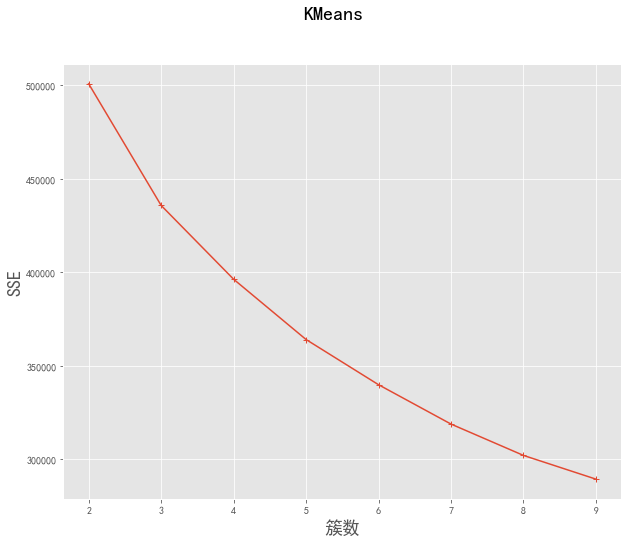

In [93]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("簇数", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()


In [94]:
from sklearn import metrics
scores = []
for k in range(2,10):
    labels = KMeans(n_clusters=k,n_jobs=4).fit(df1_z).labels_
    score = metrics.silhouette_score(df1_z, labels)
    scores.append(score)
    print(score)

0.34267942372614124
0.16762436511798592
0.14754426054864592
0.15257367191756635
0.15294822197897215
0.14835078589083606
0.15208554037986083
0.13912438027096957


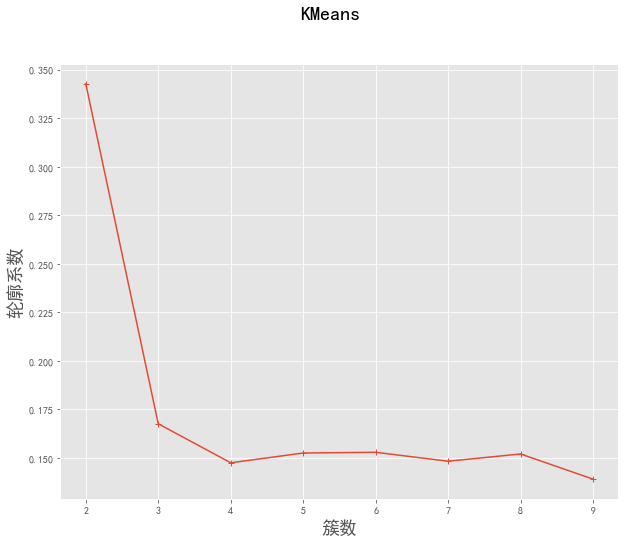

In [95]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,scores,marker="+")
ax.set_xlabel("簇数", fontsize=18)
ax.set_ylabel("轮廓系数", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()

In [99]:
num_clusters = 5
clf = KMeans(n_clusters=num_clusters,  n_init=1, n_jobs = -1,verbose=1)

In [101]:
df_train = np.array(df1_z)
clf.fit(df_train)
#print(clf.labels_)
#labels = clf.labels_
#score是轮廓系数
score = metrics.silhouette_score(df_train, labels)
# clf.inertia_用来评估簇的个数是否合适，距离越小说明簇分的越好
print (clf.inertia_)
print ("score:%s"%score)

[4 4 4 ... 1 3 3]
369722.73746341525
score:0.1546176229008634
